<a href="https://colab.research.google.com/github/varunposimsetty/FFT/blob/DFT_Python/DFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!pip install seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [20]:
def my_dft(x):
  start_time = time.time()
  N = len(x)
  X = []
  Magnitude = []
  Phase = []
  twiddle = np.zeros((N,N),dtype=complex)
  for m in range(0,N):
    X_m = 0
    for n in range(0,N):
      twiddle[m,n] = np.exp(-2j*np.pi*m*n/N)
      X_m += twiddle[m,n] * x[n]
    X.append(X_m)
    Magnitude.append(np.abs(X_m))
    Phase.append(np.angle(X_m))
  end_time = time.time()
  print("Time taken: ", end_time - start_time)
  return X, Magnitude, Phase



In [21]:
x = np.array([0.79, 0.12, -0.86, 0.54, -0.32, -0.98, 0.21, 1.05, -0.67, 0.43, 0.91, -0.18, -0.75, 0.39, 0.62, -0.47, -1.12, 0.08, 0.83, -0.59, -0.25, 0.95, -0.71, 0.35, 1.09, -0.63, -0.41, 0.58, 0.74, -0.29, -0.92, 0.16, 1.01, -0.79, 0.31, 0.87, -0.55, -0.37, 0.66, 0.81, -0.23, -1.06, 0.10, 0.97, -0.75, 0.27, 0.83, -0.61, -0.49, 0.54, 0.70, -0.33, -0.88, 0.20, 1.13, -0.83, 0.23, 0.79, -0.67, -0.45, 0.50, 0.66, -0.37, -0.84, 0.24, 1.07])
N = len(x)
X, Magnitude, Phase = my_dft(x)
print("X: ", X)
print("Magnitude: ", Magnitude)
print("Phase: ", Phase)

Time taken:  0.012958049774169922
X:  [(3.3600000000000003+0j), (-0.14322764417557265+0.35903497726585215j), (1.3843884986107338+0.3758818124863895j), (0.4296430362685242-0.5108690065212818j), (-0.8496017300004115+0.07293996982612388j), (0.4764553742113823+3.461221346994661j), (3.573838607150925+0.5742635496196726j), (3.470103140536482+1.6142311467661183j), (1.9321905537359756+0.17946053428920916j), (2.1790226404028066-0.17501339713780806j), (3.0003471538886917-0.125168439535431j), (0.7300000000000044-2.8405633244129445j), (6.759527713582421-0.4125773378454193j), (-2.419119718505373+5.959815919894982j), (4.1193414870395495+4.053859749795345j), (2.8186901737638643-0.9959646686019257j), (-2.254699591912654+2.3131744491569073j), (2.5761783116766646+8.34038457683031j), (-13.603631750041899+13.407627955401924j), (9.728560689584446-3.932655035188878j), (3.344855921023306-5.457669667243845j), (1.7703570509376518-1.3195579222348477j), (4.139999999999986-1.437602170282167j), (3.289908610044893-

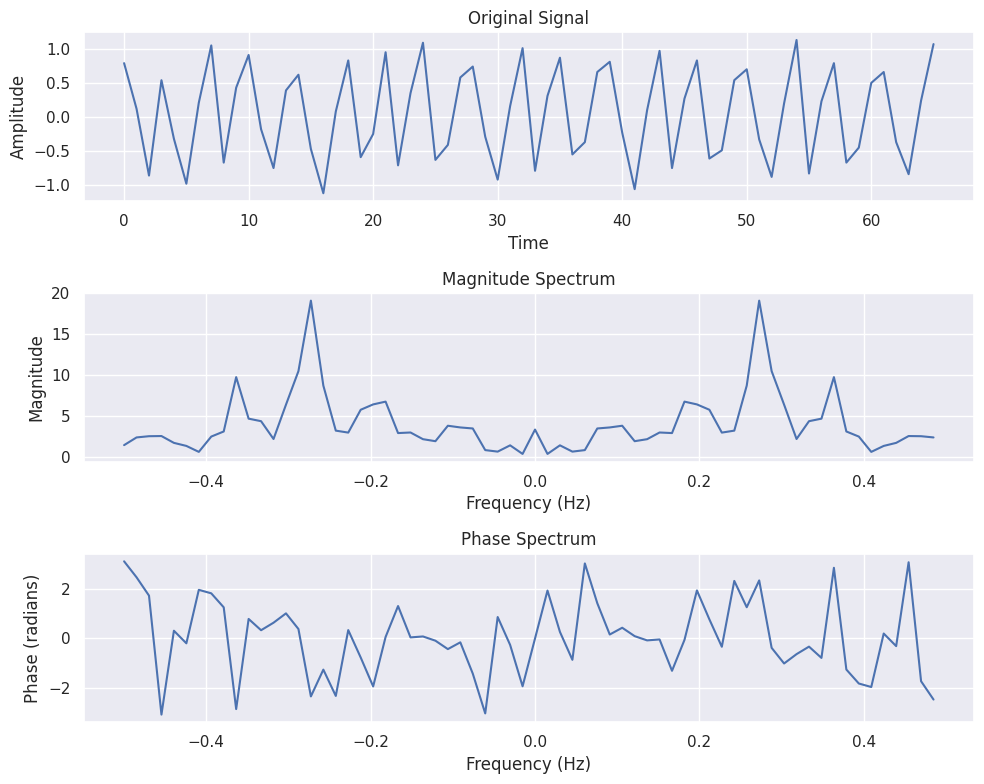

In [24]:
fs = 1
frequencies = np.fft.fftfreq(N, 1/fs)
sns.set_theme(style="darkgrid")
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8))
sns.lineplot(x=range(N), y=x, ax=ax1)
ax1.set_title("Original Signal")
ax1.set_xlabel("Time")
ax1.set_ylabel("Amplitude")

sns.lineplot(x=frequencies, y=Magnitude, ax=ax2)
ax2.set_title("Magnitude Spectrum")
ax2.set_xlabel("Frequency (Hz)")
ax2.set_ylabel("Magnitude")

sns.lineplot(x=frequencies, y=Phase, ax=ax3)
ax3.set_title("Phase Spectrum")
ax3.set_xlabel("Frequency (Hz)")
ax3.set_ylabel("Phase (radians)")

plt.tight_layout()
plt.show()